In [1]:
%pylab inline
import scipy.integrate as integrate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
# solve_ivp functions

# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xs,K,koff,a0):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Ac = y[1:N+1]          # bound complex on lattice
    As = y[-N:]             # unbound complex on lattice
    
    dxdt = integrate.trapz(-(x0-xs)*Ac, x=xs)
    binding = exp(-0.5*(x0-xs)**2)*As 
    burnt = nu*Ac
    rebinding = koff/(1+K)*a0-koff*As

    dAcdt = (binding - burnt)
    dAsdt = -binding +rebinding
    
    return array( [dxdt] + list(dAcdt) + list(dAsdt))

In [28]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return 95.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

[1.] [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


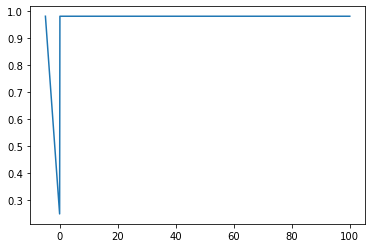

In [39]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

tf = 75.0

a0s = ones(1)*1.0
a0_n = len(a0s)
nus = array([0.001,0.01, 0.1,1,10])
nu_n = len(nus)

dG = 4

K = exp(-4)
koff = K

# define domain and lattice
Lmax = 100.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xAs = linspace(Lmin, Lmax, Nx)

print(a0s,nus)

a0 = a0s[0]
astdy = a0/(1+koff)
A0x = linspace(astdy,-astdy*15, Nx)
A0x[xAs>=0.0] = astdy

plot(xAs,A0x)

In [40]:

#I.C.

vs = []  # record final speed and burn rate
burnt = []
ts = []

K = Ks[0]
koff = koffs[0]



for nu in nus:
    print(nu)
    x0 = 0.0

    Acx = zeros(Nx)

    y0 = array([x0] + list(Acx) + list(A0x))

    sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xAs,K,koff,a0), (0., tf), y0, events=[event], method='BDF')

    btmp = []
    vtmp = []
    for t in range(len(sol.t)):
        speed = derivs(sol.t[t], sol.y[:,t], nu, xAs,K,koff,a0)[0]
        vtmp.append(speed)
        Acxf = sol.y[1:1+Nx,t]
        btot = integrate.trapz(nu*Acxf, x=xAs)
        btmp.append(btot)

    vs.append(vtmp)
    burnt.append(btmp)
    ts.append(sol.t)

0.001
0.01
0.1
1.0
10.0


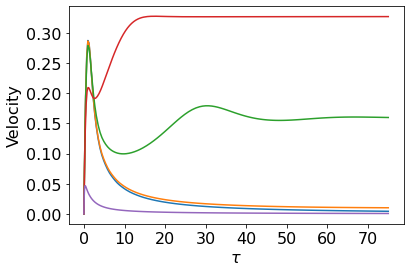

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

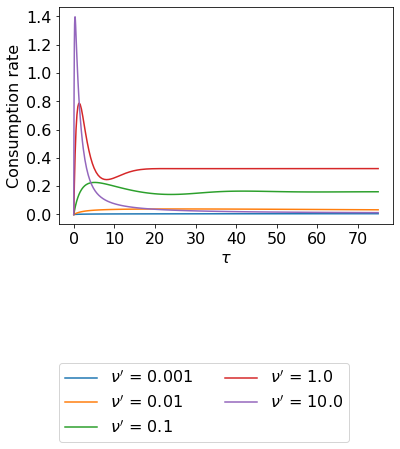

In [41]:

for i in range(nu_n):
    plot(ts[i],vs[i], label = r"$\nu'$ = "+ str(round(nus[i],2)))
ylabel("Velocity", fontsize = 16)
xlabel(r"$\tau$", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()

for i in range(nu_n):
    plot(ts[i],burnt[i], label = r"$\nu'$ = "+ str(round(nus[i],3)))
legend(loc = (0,-1),fontsize = 16, ncol = 2)
xlabel(r"$\tau$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
